# Project Planning Stage (Individual)

In [1]:
# Run this cell before continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# *(1) Data Description*: Players Data

- Number of Observations: 196
- Number of Variables: 7
- Name, Type, and Variable Meanings:
  - `experience` (*chr*): How adept the player is at the game (beginner, amateur, regular, pro, and veteran)
  - `hashedEmail` (*chr*): Each player's specific email identity
  - `name`  (*chr*): The name of the player
  - `gender` (*chr*): Each player's gender (male, female, or other)
  - `played_hours` (*dbl*): The total time spent playing the game for each player (hours)
  - `Age` (*dbl*): The ages of players (years)
  - `subscribe` (*lgl*): If player is subscribed to a game related newsletter (true or false)
- Any Issues in Data: experience level and number of hours played not matching up
- How data was collected: Data was collected from a research group in Computer Science conducted by Frank Wood using PlaiCraft to host a minecraft server recording player's actions and navigation through the world

- Summary statistics for the players data:

In [2]:
players <- read_csv("data/players.csv")
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Rounded to two decimal places mean, min, and max values for played_hours and Age respectively:

In [27]:
played_h_mean <- round(summary(players$played_hours)[["Mean"]], 2)
played_h_min <- round(min(players$played_hours),2)
played_h_max <- round(max(players$played_hours),2)

age_mean <- round(summary(players$Age)[["Mean"]], 2)
age_min <- round(min(players$Age, na.rm = TRUE),2)
age_max <- round(max(players$Age, na.rm = TRUE),2)

cat("Played hours mean =", played_h_mean, "\n")
cat("Played hours min =", played_h_min, "\n")
cat("Played hours max =", played_h_max, "\n")
cat("Age mean =", age_mean, "\n")
cat("Age min =", age_min, "\n")
cat("Age max =", age_max, "\n")

Played hours mean = 5.85 
Played hours min = 0 
Played hours max = 223.1 
Age mean = 21.14 
Age min = 9 
Age max = 58 


# *(1) Data Description*: Sessions Data

- Number of Observations: 1535

- Number of Variables: 5

- Name, Type, and Variable Meanings:
  - `hashedEmail` (*chr*): Each player's email identity
  - `start_time` (*chr*): The start date and time when a player starts a session (formatted as day/month/year)
  - `end_time` (*chr*): The end date and time when a player stops the session (formatted as day/month/year)
  - `original_start_time` (*dbl*): The raw start time of the player before it was formatted (in milliseconds)
  - `original_end_time` (*dbl*): The raw end time of the player before it was formatted (in milliseconds)
  
- Any Issues in Data: possible time zone mismatch

Summary statistics for sessions data:

In [4]:
sessions <- read_csv("data/sessions.csv")
summary(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

Rounded to two decimal places mean, min, and max values for original_start_time and original_end_time respectively:

In [38]:
original_st_mean <- round(summary(sessions$original_start_time)[["Mean"]],2)
original_st_min <- round(min(sessions$original_start_time),2)
original_st_max <- round(max(sessions$original_start_time),2)

original_et_mean <- round(summary(sessions$original_end_time)[["Mean"]],2)
original_et_min <- round(min(sessions$original_end_time, na.rm = TRUE),2)
original_et_max <- round(max(sessions$original_end_time, na.rm = TRUE),2)

cat("Original start time mean =", original_st_mean, "\n")
cat("Original start time min =", original_st_min, "\n")
cat("Original start time max =", original_st_max, "\n")
cat("Original end time mean =", original_et_mean, "\n")
cat("Original end time min =", original_et_min, "\n")
cat("Original end time max =", original_et_max, "\n")

Original start time mean = 1.719201e+12 
Original start time min = 1.7124e+12 
Original start time max = 1.72733e+12 
Original end time mean = 1.719196e+12 
Original end time min = 1.7124e+12 
Original end time max = 1.72734e+12 


# *(2) Questions*
**Broad Question:** We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific Question:** Can the variables experience and Age predict played_hours in the players dataset?

**How data will address the question:** The players dataset will answer this question as it includes the columns experience, age, and played_hours, providing information about which "kinds" of players will contribute a large amount of data. With this data I will use knn regression for my predictive analysis and wrangle the players dataset to only select the 3 columns stated above. Also, I will change the experience column to use "dummy numerical variables" since it is a categorical variable.

# *(3) Exploratory Data Analysis and Visualization*

Loading in players data:

In [42]:
players_data <- as_tibble(players) |>
    mutate(experience = as_factor(experience)) |>
    head(10)
players_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Loading in sessions data:

In [37]:
sessions_data <- as_tibble(sessions) |>
    mutate(start_time = as_datetime(start_time), end_time = as_datetime(end_time)) |>
    head(10)
sessions_data

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2030-06-21 00:18:12,2030-06-21 00:18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2017-06-21 00:23:33,2017-06-21 00:23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2025-07-21 00:17:34,2025-07-21 00:17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2025-07-21 00:03:22,2025-07-21 00:03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2025-05-21 00:16:01,2025-05-21 00:16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2023-06-21 00:15:08,2023-06-21 00:17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2015-04-21 00:07:12,2015-04-21 00:07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2021-09-21 00:02:13,2021-09-21 00:02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2021-06-21 00:02:31,2021-06-21 00:02:49,1.71894e+12,1.71894e+12


Mean average for each quantitative variable in the players dataset:

In [8]:
players_mean_table <- tibble(variable = c("played_hours", "Age"), mean_average = c(played_h_mean, age_mean))
players_mean_table

variable,mean_average
<chr>,<dbl>
played_hours,5.85
Age,21.14


Load in visualization of played_hours VS experience:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


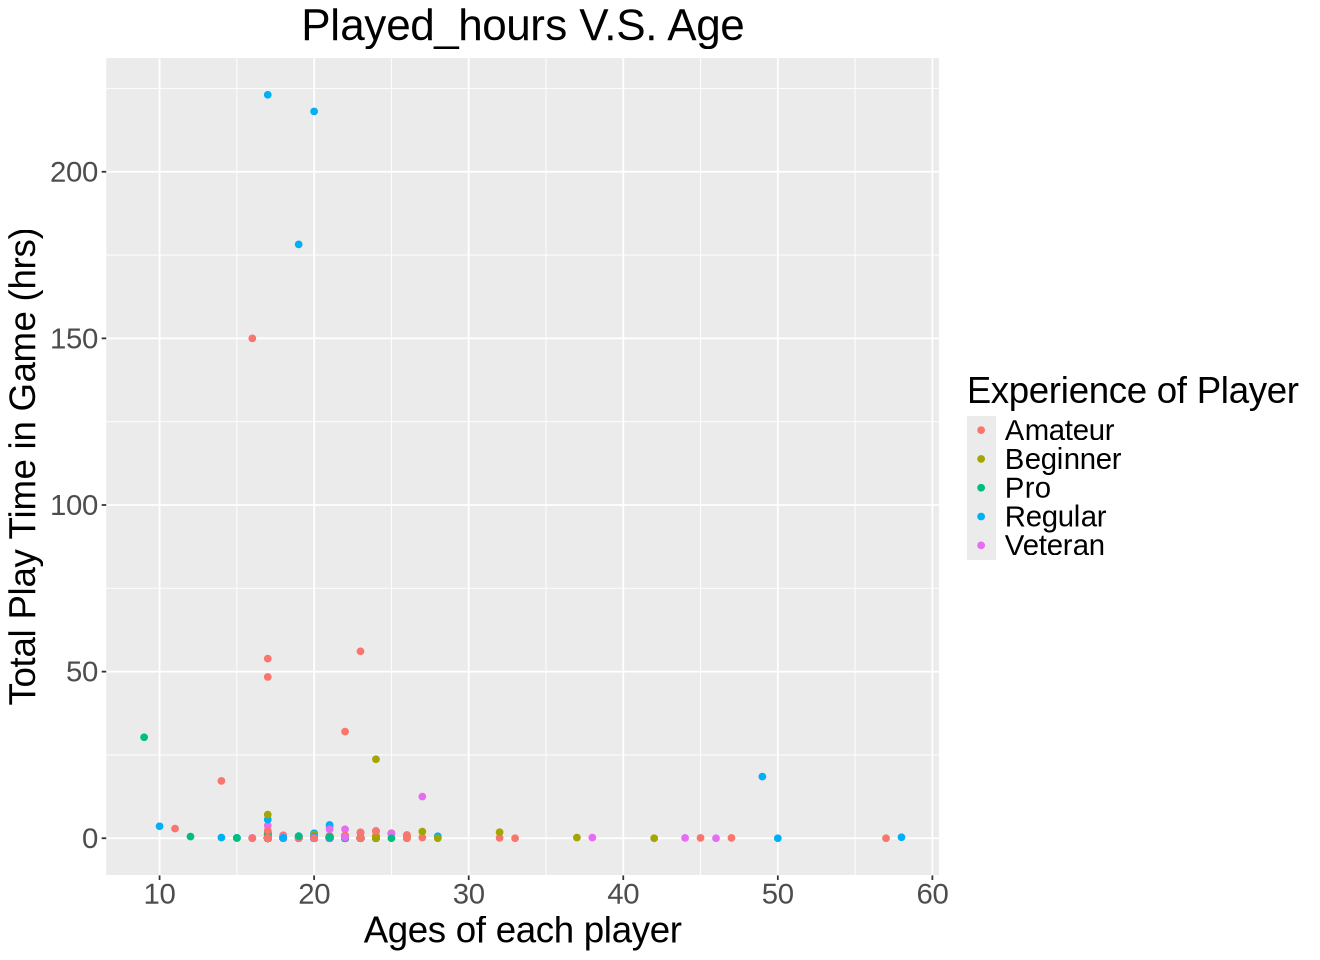

In [35]:
options(repr.plot.width = 11, repr.plot.height = 8)
hours_experience_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point() +
    labs(
        x = "Ages of each player",
        y = "Total Play Time in Game (hrs)",
        color = "Experience of Player",
        title = "Played_hours V.S. Age") +
    theme(text = element_text(size = 22),
         plot.title = element_text(hjust = 0.5))
hours_experience_plot

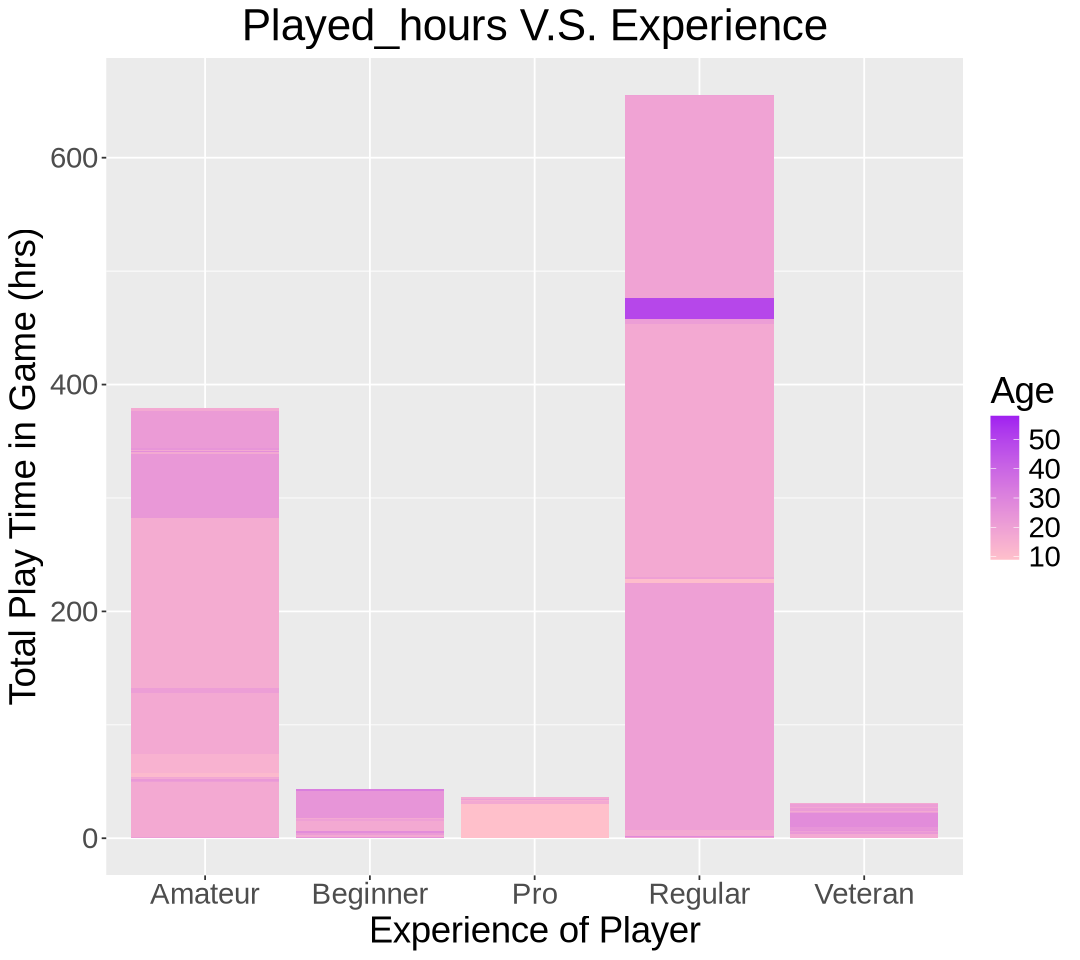

In [34]:
options(repr.plot.width = 9, repr.plot.height = 8)
hours_age_plot <- players |>
    ggplot(aes(x = experience, y = played_hours, fill = Age)) +
    geom_bar(stat = "identity") +
    labs(
        x = "Experience of Player",
        y = "Total Play Time in Game (hrs)",
        fill = "Age",
        title = "Played_hours V.S. Experience") +
    theme(text = element_text(size = 22),
         plot.title = element_text(hjust = 0.5)) +
    scale_fill_gradient(low = "pink", high = "purple")
hours_age_plot

**Insights gained from the graphs above on the players dataset**: From the scatter plot, people in the ages 15-25 has more play time then the other groups which could mean that they have more time/bigger interest playing games. From the bar graph, people in the amateur and regular experience groups had longer play times than other groups which could be because it can take newer players more time to get used to the game mechanics and regular players are more casual with their play style compared to veteran players who already know how to play really well.

# *(4) Methods and Plan*

**Proposed Method**: Using knn regression to predict the played_hours for each player given the data from the experience and age columns

**Explanation**: KNN regression is appropriate because the variables show a weak linear relationship and this method makes minimal assumptions about the data shape. Some limitations include slower prediction times and poor performance on values outside the training range. The model will be tuned and evaluated using 5-fold cross validation. Firstly, data will be preprocessed to only include relevant columns, then split into 75% training and 25% testing sets, standardized, and used to identify the best k value through a validation set. Then the final model will be used on the testing set to predict the played_hours and results will be visualized.

# *(5) Github Repository*

Github Repository Link: https://github.com/iSqlqmi/dsci-project.git 